In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
tips = sns.load_dataset("tips")
print(type(tips)) # <class 'pandas.core.frame.DataFrame'>
print(tips.head())

<class 'pandas.core.frame.DataFrame'>
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


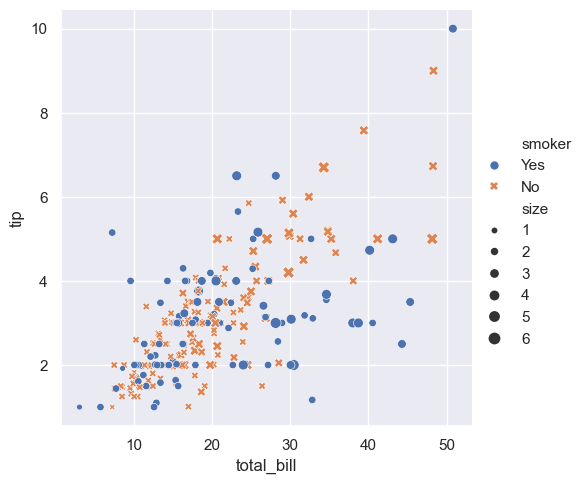

In [20]:
sns.set_theme(style="ticks") #darkgrid, whitegrid, white, dark
sns.set_theme()
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    size="size",
    style="smoker"
)

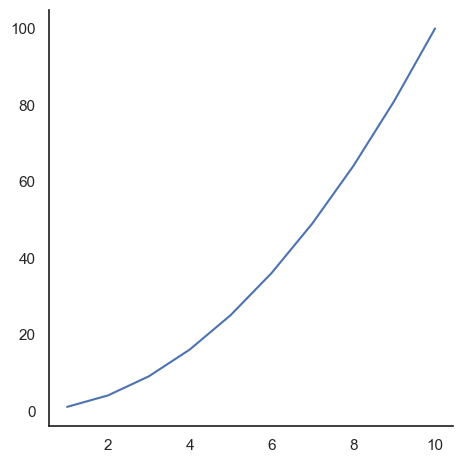

In [28]:
x_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_sq = [i**2 for i in x_vals]

sns.set_theme(style="white")
sns.relplot(
    x = x_vals,
    y = y_sq,
    kind="line"
)

<Axes: xlabel='total_bill', ylabel='tip'>

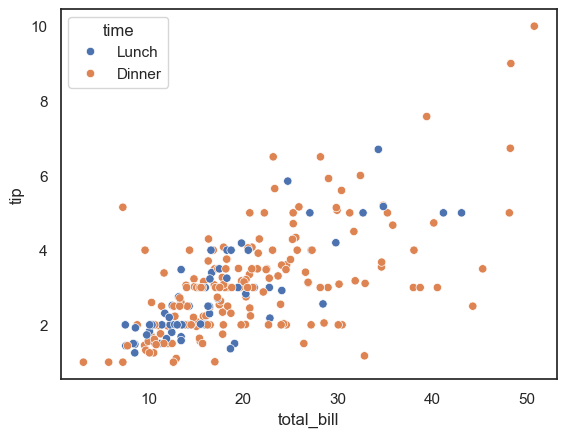

In [31]:
# Relational Plots
#Scatter Plots
tips = sns.load_dataset("tips")

sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time"
)

In [33]:
# Line Plots
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='year', ylabel='passengers'>

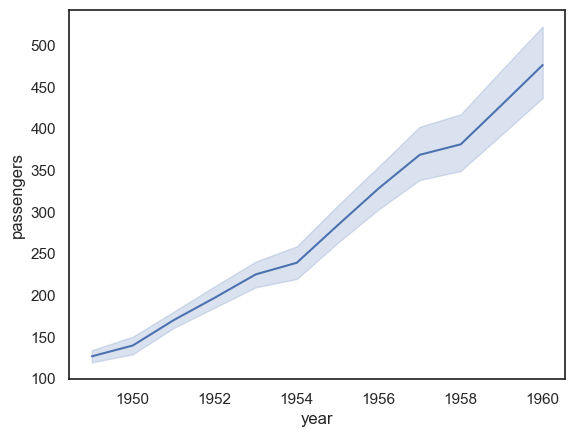

In [34]:
sns.lineplot(
    data=flights,
    x="year",
    y="passengers"
)

In [36]:
# Categorical Plots
# Bar Plots
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<Axes: xlabel='day', ylabel='tip'>

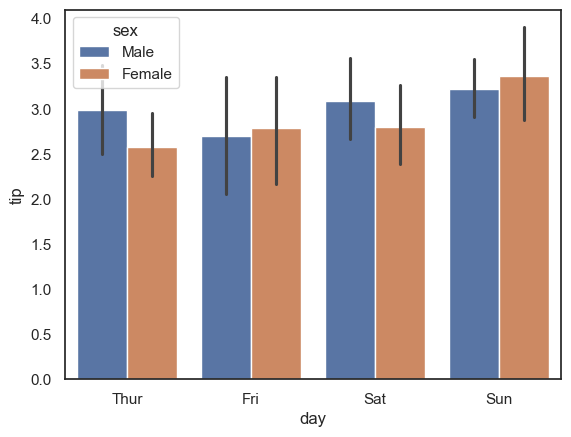

In [37]:
sns.barplot(
    data=tips,
    x="day",
    y="tip",
    hue="sex"
)

<Axes: xlabel='day', ylabel='tip'>

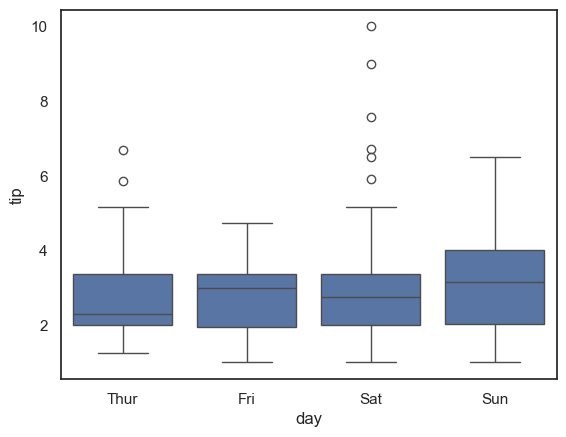

In [39]:
# Box Plots
sns.boxplot(
    data=tips,
    x="day",
    y="tip"
)

In [40]:
# Distribution Plots in Seaborn - Histograms
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='body_mass_g', ylabel='Count'>

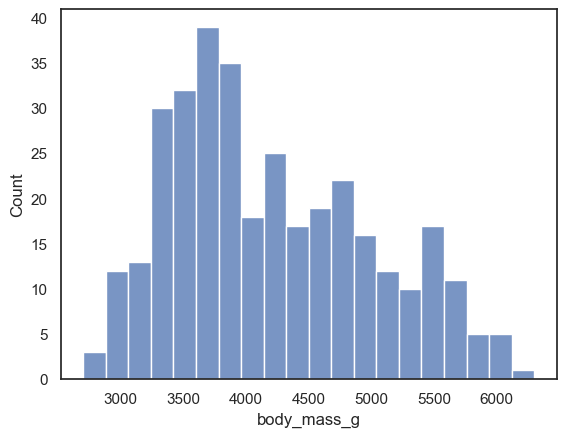

In [44]:
sns.histplot(
    data=penguins,
    x="body_mass_g",
    bins=20
)

In [46]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Titanic Dataset: Fare Analysis Notes

## 1. Analyzing the Default Bar Plot (Mean)
When using `sns.barplot` without extra parameters, Seaborn calculates the **Mean**.

### Visual Breakdown
* **Bar Height (The Average):**
    * **First Class:** ~£85 (Highest).
    * **Second Class:** ~£20.
    * **Third Class:** ~£13.
* **Black Vertical Lines (Error Bars):**
    * These represent the **95% Confidence Interval** (uncertainty).
    * **First Class (Long Line):** Indicates **high variance**. Prices varied significantly (e.g., standard cabins vs. luxury suites).
    * **2nd/3rd Class (Short Lines):** Indicates **low variance**. Prices were very standardized and consistent.

---

## 2. Analyzing the Median Plot
For financial data (like ticket fares), the **Mean** can be misleading because extreme outliers (super expensive tickets) pull the average up. The **Median** represents the "middle" or "typical" passenger better.

---

## 3. Result: What happens when we use Median?
When switching to `estimator=np.median`, the graph changes in one specific way:

* **The First Class bar gets significantly shorter** (dropping from ~85 to ~60).
* **Reason:** The "Mean" was inflated by a few extremely expensive tickets (outliers). The "Median" ignores these outliers and shows the price a *typical* First Class passenger actually paid.
* **Conclusion:** The price gap between First Class and the others is still large, but not as extreme as the Mean suggested.

### Python Code to Plot Median
To switch from Mean to Median, you must import `numpy` and use the `estimator` parameter.

```python
import seaborn as sns
import numpy as np  # Required for calculation

# Load dataset
titanic = sns.load_dataset("titanic")

# Create Plot
sns.barplot(
    data=titanic,
    x="class",
    y="fare",
    estimator=np.median # Tells Seaborn to calculate Median, not Mean
)


<Axes: xlabel='class', ylabel='fare'>

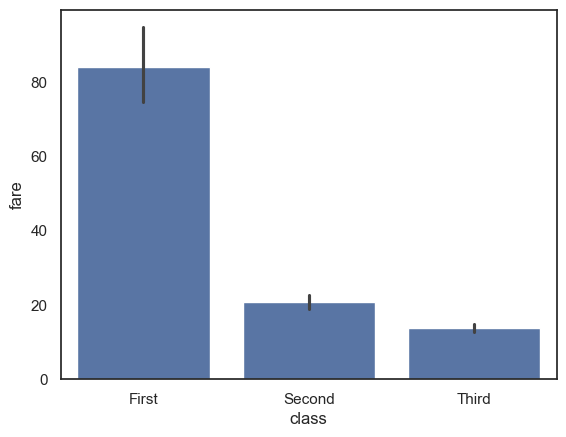

In [52]:
sns.barplot(
    data=titanic,
    x="class",
    y="fare"
)

<Axes: xlabel='class', ylabel='fare'>

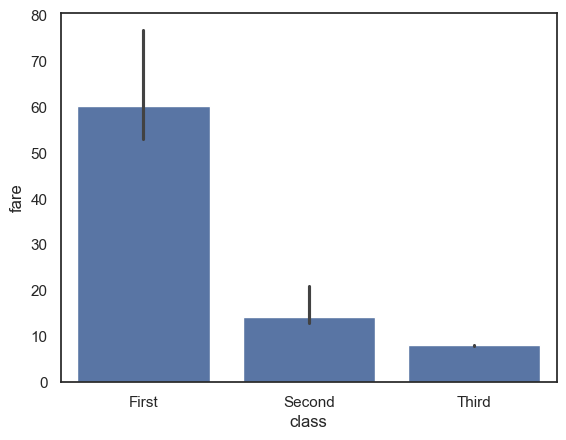

In [51]:
import numpy as np
sns.barplot(
    data=titanic,
    x="class",
    y="fare",
    estimator=np.median # This tells Seaborn to calculate Median instead of Mean
)

In [54]:
# Matrix Plots
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [58]:
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


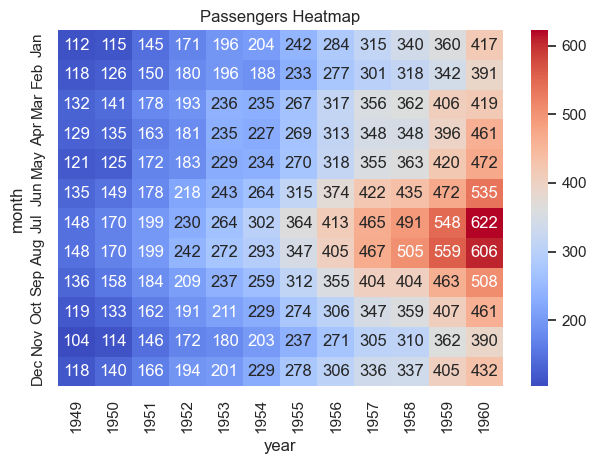

In [62]:
sns.heatmap(
    data=flights_pivot,
    cmap="coolwarm",
    annot=True,
    fmt="d"
)

plt.title("Passengers Heatmap")
plt.tight_layout()

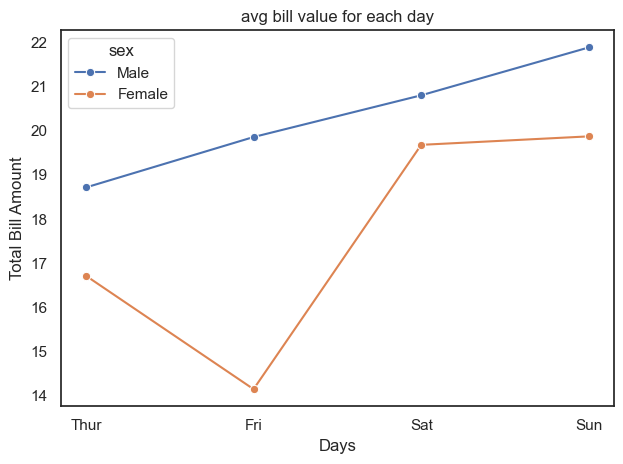

In [70]:
fig, ax = plt.subplots()

sns.lineplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex",
    marker="o",
    ax=ax,
    errorbar=None
)

ax.set_title("avg bill value for each day")
ax.set_xlabel("Days")
ax.set_ylabel("Total Bill Amount")

fig.tight_layout()